<a href="https://colab.research.google.com/github/askery/computacao-quantica-aplicada-ao-mercado-financeiro/blob/main/Quantum_Finance_DualQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Exemplos práticos de otimização de portfólio com computação clássica e quântica </h1>

Esse notebook é um suporte ao nosso artigo na RBEF. 

<a href="https://doi.org/10.1590/1806-9126-RBEF-2022-0099" target="_blank"> Artigo em PDF</a>

# Portfólio ou Carteira

A **carteira** ou **portfólio** de um investidor é basicamente o seu investimento em diferentes tipos de ativos.

Por exemplo, se você tem investimentos (ações) em 5 empresas, digamos: Google, Amazon, Tesla, Petrobras e Vale. Além disso, algum investimento em criptomoedas: Bitcoin e Ethereum. 

Essas 5 empresas mais as 2 criptomoedas compõem sua carteira de investimentos.

# Ativos, Retorno e Risco

**Ativos** pode ser de vários tipos. São exemplos de ativos (lista não euxastiva):

- Ações
- Criptomoedas (e. g. Bitcoin - BTC)
- Dinheiro
- Cota de fundos de investimento
- Títulos do Tesouro

Normalmente, quando você constrói um portfólio, é aconselhável diversificar seus ativos ou comprar diferentes tipos de ativos de diferentes empresas. Para todos os ativos, você obterá lucro após um período de tempo especificado. No entanto, o lucro pode não ser o mesmo para cada investimento feito.

Esse lucro, ou prejuízo, é o que chamamos de **retorno**. Por exemplo, você obterá retornos de ações quando o valor de mercado subir e/ou com a distribuição de lucros "em dinheiro" na forma de dividendos.

Há diversos aspectos de **risco**, como falência das empresas, recuperação judicial, risco regulatório etc. Para o contexto de gestão de portfólio interessa o risco associado às flutuações no valor do ativo, ou volatilidade do ativo. Para certos ativos, seu valor é altamente volátil, ou seja, o valor flutua bastante, e. g. Bitcoin. Enquanto alguns outros ativos, como títulos do governo e certas ações são mais estáveis, sendo relativamente mais resistentes às condições de mercado, mas podem dar retornos menores em comparação com aqueles de alto risco.


In [ ]:
# Instalando o pacote para aquisição de dados - Yahoo! Finance market data downloader
%%capture 
!pip install yfinance
!pip install pandas-bokeh

In [ ]:
# Importando pacotes úteis
import numpy as np
import pandas as pd
import pandas_bokeh
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
#
import matplotlib.pyplot as plt
#
pandas_bokeh.output_notebook()

In [ ]:
# Exemplo de leitura de dados financeiros dos ativos com o yfinance
#
# Obs1: O ticker das ações brasileiras precisa de um ".SA" para a API funcionar.
#       Os preços estão em Reias (BRL). É interessante não analisar junto 
#       com ativos em dólar (USD) ou fazer conversão.
# Obs2: O mercado de cripto funciona 24 horas, todos os dias, não só os úteis.
#       Assim, é interessante analisar separadamente ou com exclusão 
#       de fim de semanas ou feriados para evitar "NaN" dos demais ativos.
#
# Parâmetros de entrada da API: lista de ativos, data inicial, data final
ativos       = "BTC-USD"    # Bitcoin
data_inicial = "2016-01-01" # formato: YYYY-MM-DD (Ano-Mês-Dia)
data_final   = "2021-09-20"
# Saída: pandas DataFrame com dados de Open, High, Low, Close, Adj Close e Volume.
#        Da data mais antiga a mais recente (de cima para baixo)
teste        = pdr.get_data_yahoo(ativos, start=data_inicial, end=data_final)
teste

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600
...,...,...,...,...,...,...
2021-09-15,47098.000000,48450.468750,46773.328125,48176.347656,48176.347656,30484496466
2021-09-16,48158.906250,48486.828125,47079.558594,47783.359375,47783.359375,31764293754
2021-09-17,47771.003906,48160.921875,46832.523438,47267.519531,47267.519531,28727713711


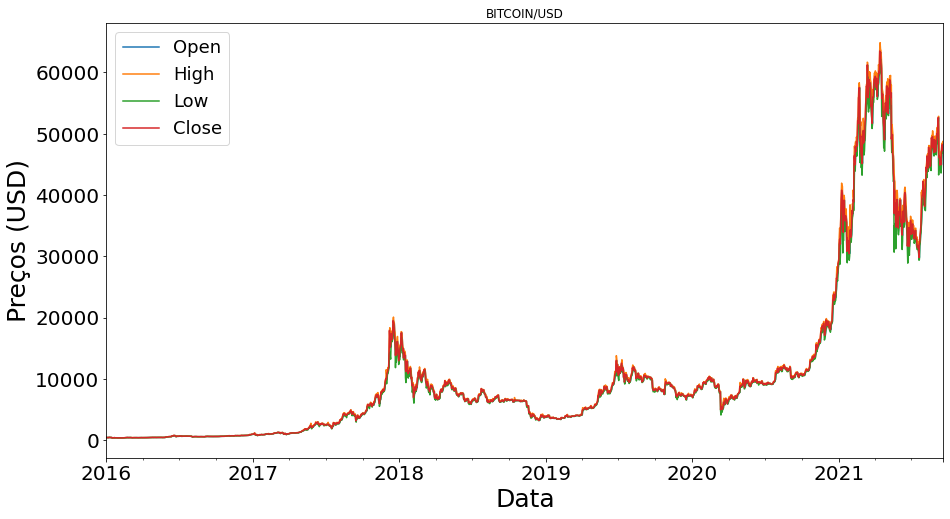

In [ ]:
# Plot dos preços de 'Open', 'High', 'Low', 'Close' de um ativo
colunas = ['Open', 'High', 'Low', 'Close']
teste[colunas].plot(figsize=[15,8], title = 'BITCOIN/USD')
plt.xlabel('Data',  fontsize=25)
plt.ylabel('Preços (USD)',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=18);
plt.show()

In [ ]:
#Plot OHLC Interativo
teste[colunas].plot_bokeh(kind="line"); 

In [ ]:
# Consultando vários ativos
# Escolha uma lista de ativos
# Ações brasileiras
ativos =  ['BRKM5.SA', 'ITUB4.SA', 'VALE3.SA', 'KLBN4.SA'] # Braskem, Itaú, Vale e Kablin -> cotação em Reais (R$)
#Obs: o símbolo das ações brasileiras precisam de um ".SA" para a API funcionar
# Ações americanas
#ativos =  ['FB','AMZN','NFLX','GOOGL']     # FANG -> Facebook, Amazon, Google e Netflix -> cotação em dólar
#  Ou
#ativos =  ['AAPL', 'NKE', 'GOOGL', 'AMZN'] # Apple, Nike, Google e Amazon -> cotação em dólar
# Criptomoedas
#ativos = ['BTC-USB', 'ETH-USD']  # Criptomoedas    -> cotação em dólar
#
df  =  pdr.get_data_yahoo(ativos, start="2016-01-01", end="2021-09-20")
df.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                   Close             \
             BRKM5.SA   ITUB4.SA  KLBN4.SA  VALE3.SA BRKM5.SA   ITUB4.SA   
Date                                                                       
2016-01-04  16.789963  11.438276  1.663952  8.448509    27.10  15.230303   
2016-01-05  16.065081  11.533863  1.663952  8.335330    25.93  15.357575   
2016-01-06  17.192675  11.488343  1.663952  7.722830    27.75  15.296969   
2016-01-07  16.728004  11.269868  1.663952  7.263456    27.00  15.006060   
2016-01-08  16.771374  11.274420  1.663952  7.017123    27.07  15.012121   

                                   High             ...      Low           \
           KLBN4.SA VALE3.SA   BRKM5.SA   ITUB4.SA  ... KLBN4.SA VALE3.SA   
Date                                                ...                     
2016-01-04     2.24    12.69  27.309999  15.812121  ...     2.24    12.48   
2016-01-05     2.24    12.52  27.480000  15.624242  ...     2.24    12.41   
2016-01-06     2.24    11.60  27.980000  15.654545  ...     2.24    11.59   
2016-01-07     2.24    10.91  28.170000  15.327272  ...     2.24    10.88   
2016-01-08     2.24    10.54  27.670000  15.303030  ...     2.24    10.54   

                 Open                                Volume            \
             BRKM5.SA   ITUB4.SA KLBN4.SA VALE3.SA BRKM5.SA  ITUB4.SA   
Date                                                                    
2016-01-04  27.080000  15.709090     2.24    12.49  1533100  38071770   
2016-01-05  27.230000  15.393939     2.24    12.67  2567900  21093105   
2016-01-06  25.610001  15.151515     2.24    12.08  3389600  33520575   
2016-01-07  27.469999  15.090909     2.24    11.26  2465800  28766430   
2016-01-08  27.020000  15.121212     2.24    11.07  1520300  18087465   

                              
           KLBN4.SA VALE3.SA  
Date                          
2016-01-04        0  4587900  
2016-01-05        0  2693500  
2016-01-06        0  6758900  
2016-01-07        0  6450400  
2016-01-08        0  4429400  

[5 rows x 24 columns]

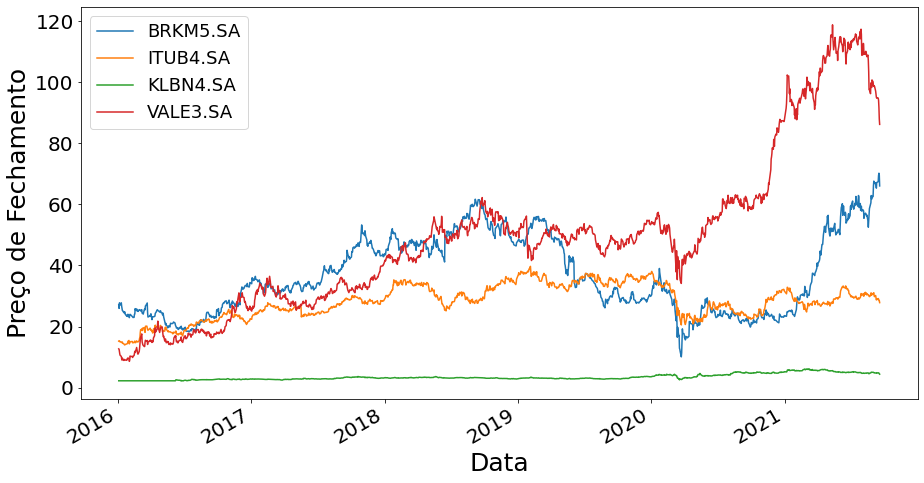

In [ ]:
#Plot
# Selecionando só preço de fechamento
df    = df['Close'] 
#
df.plot(figsize=[15,8])
plt.xlabel('Data',  fontsize=25)
plt.ylabel('Preço de Fechamento',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=18);
plt.show()

In [ ]:
#Plot interativo de vários ativos 
df.plot_bokeh(kind="line"); 

<font color="blue"> Note a diferença de escala dos valores das ações. Uma prática corriqueira é tomar o "log". </font>

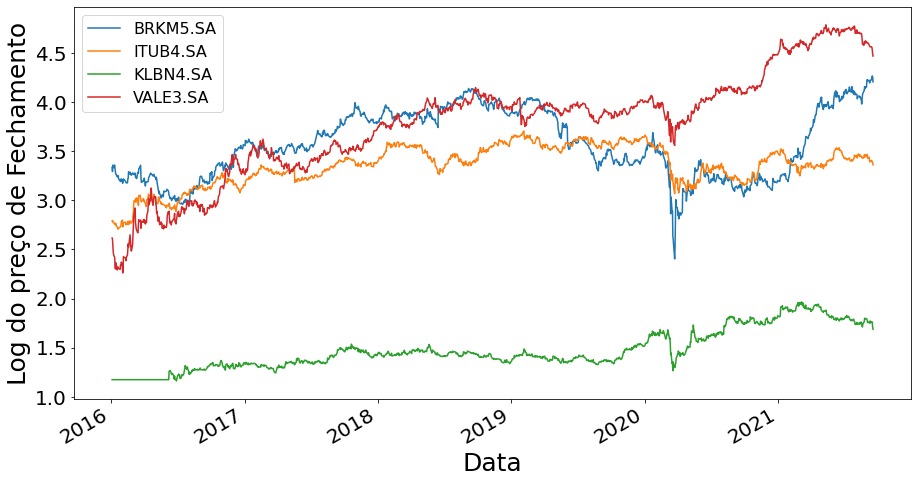

In [ ]:
np.log(df + 1).plot(figsize=[15,8]) # "+1" evita logaritmando negativo para ações cotadas abaixo de "1"
plt.xlabel('Data',  fontsize=25)
plt.ylabel('Log do preço de Fechamento',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=16);
plt.show()

In [ ]:
#Plot interativo
np.log(df + 1).plot_bokeh(kind="line"); 

# Otimização de portfólio

Um bom portfólio é aquele que nos dá o máximo retorno com o mínimo de risco. Porém, como decidimos, entre as infinitas combinações possíveis de carteiras, aquela que é ótima? Ou seja, como é feita a otimização de portfólio?

A Teoria Moderna do Portfólio, formulada por H. Markowitz, também conhecida como análise de variância média, é um processo matemático que permite ao usuário maximizar os retornos para um determinado nível de risco.

A teoria assume que todos os investidores são avessos ao risco, ou seja, se houver uma escolha entre carteiras de baixo e alto riscos com os mesmos retornos, um investidor escolherá uma com baixo risco.

De um modo geral, a teoria incentiva a diversificação de ativos. Ele diz que um ativo A de alta variação, se combinado com diversos ativos B e C, onde A, B e C têm pouca ou nenhuma correlação, pode nos dar uma carteira com baixa variação de retornos. Este é um ponto crucial da Teoria. Outro ponto crucial é mostrar que buscar maiores retornos significa se expor a mais risco (volatilidade).


# Fronteira Eficiente

Sabemos que cada ativo em uma carteira tem sua própria taxa de retorno e riscos esperados. É possível criar várias combinações de ativos que podem fornecer retornos elevados para um nível de risco predefinido. Da mesma forma, pode haver várias carteiras que oferecem o menor risco para um retorno esperado predefinido.

Fronteira eficiente é determinada através do gráfico com 'retornos' (Y) versus 'volatilidade' (X). Mostra o conjunto de carteiras ideais que oferecem o maior retorno esperado para um determinado nível de risco ou o menor risco para um determinado nível de retorno esperado.

As carteiras que estão abaixo da fronteira eficiente são sub-ótimas porque não fornecem retorno suficiente para o nível de risco ou têm um risco maior para a taxa de retorno definida.

Você aprenderá a reproduzir a fronteira eficiente abaixo!

![picture](https://www.dualq.tech/wp-content/uploads/fronteira_vf4.png)

# Conceitos Fundamentais em Otimização de Portfólio

- **Retornos esperados**

Os retornos esperados de um ativo são simplesmente a média da variação percentual nos preços de suas ações. Portanto, o valor do retorno esperado que obtemos aqui são os retornos esperados diários. Para um valor de retorno anual esperado, você precisará reamostrar os dados a cada ano, como verá mais adiante.

O retorno do dia $i$, $R_i$, é definido como:

$R_i =  (p_i - p_{i-1}) /p_{i-1}$,
aqui calculamos a variação percentual entre o preço do dia $i$ e do dia $i-1$.

Podemos generalizar para o retorno entre o dia $i$ e o dia $j$ fazendo,

$R_{ij} =  (p_i - p_{j}) /p_{j}$. Como há cerca de $250$ (para criptomoedas use $365$). o retorno anual pode ser aproximado por

$R_{anual} = (p_i - p_{i-250}) /p_{i-250}$.


O retorno logarítmico é definido como

$r_i =  ln(p_i/p_{i-1})$, ou, de modo geral

$r_{ij} =  ln(p_i) - ln(p_{j})$. Uma vantagem é ser adtivo no tempo. Note que $r_{31} = r_{32} + r_{21}$.







In [ ]:
# Variação percentual diária ou retorno diário
retorno = df.pct_change()#.apply(lambda x: np.log(1+x))
retorno

,BRKM5.SA,ITUB4.SA,KLBN4.SA,VALE3.SA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.043173,0.008357,0.000000,-0.013396
2016-01-06,0.070189,-0.003946,0.000000,-0.073482
2016-01-07,-0.027027,-0.019017,0.000000,-0.059483
2016-01-08,0.002593,0.000404,0.000000,-0.033914
...,...,...,...,...
2021-09-13,0.002976,0.012496,0.006263,-0.000527
2021-09-14,0.029970,-0.006171,0.006224,-0.007071
2021-09-15,0.010804,-0.016212,-0.020619,-0.024976


<font  color="blue"> Observe que a primeira linha apresenta NaN (Not a Number), pois a variação percentual (retorno) só é definida a partir do segundo ponto (dia, neste caso) de um dado intervalo. </font>



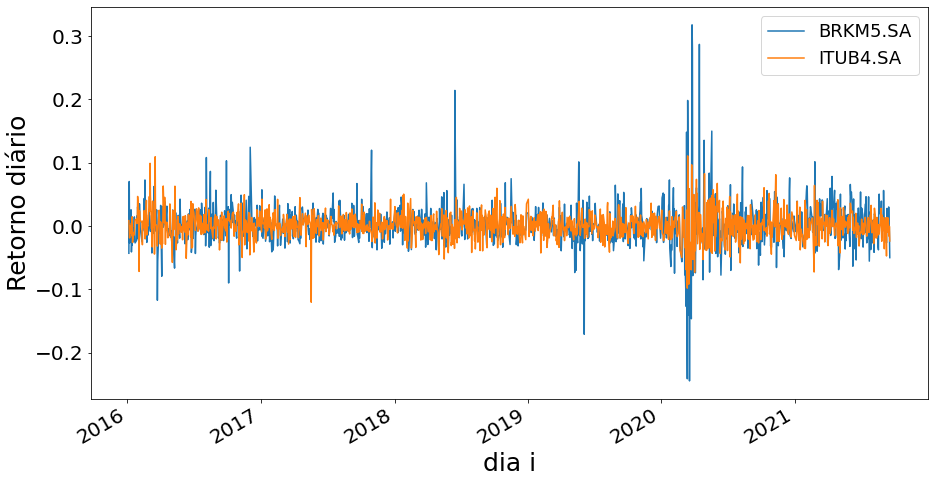

In [ ]:
#Plot do retorno diário dos n primeiros ativos
n = 2
retorno[ativos[0:n]].plot(figsize=[15,8]) #n ativos
plt.xlabel('dia i',  fontsize=25)
plt.ylabel('Retorno diário',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=18);
plt.show()

In [ ]:
log_retorno = np.log(df/df.shift())
#log_retorno = df.pct_change().apply(lambda x: np.log(1+x))
log_retorno

,BRKM5.SA,ITUB4.SA,KLBN4.SA,VALE3.SA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.044133,0.008322,0.000000,-0.013487
2016-01-06,0.067835,-0.003954,0.000000,-0.076322
2016-01-07,-0.027399,-0.019201,0.000000,-0.061325
2016-01-08,0.002589,0.000404,0.000000,-0.034502
...,...,...,...,...
2021-09-13,0.002972,0.012418,0.006244,-0.000527
2021-09-14,0.029530,-0.006190,0.006205,-0.007096
2021-09-15,0.010746,-0.016345,-0.020834,-0.025293


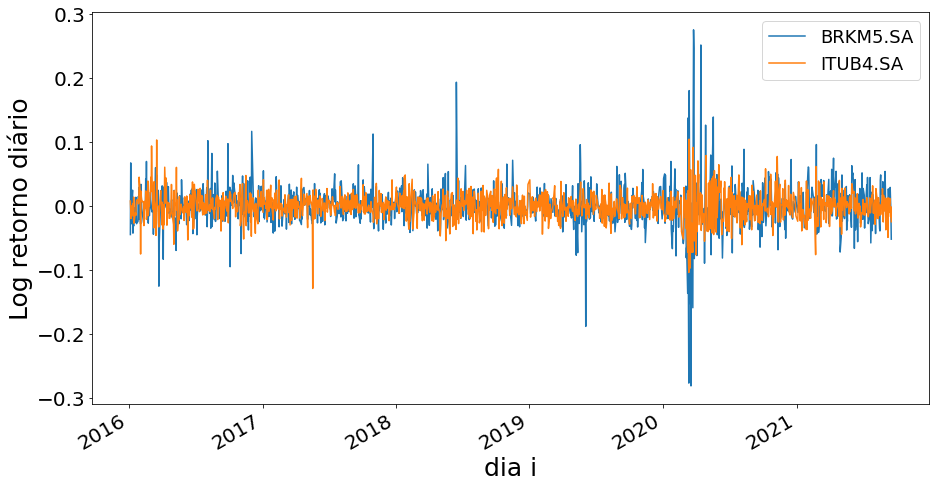

In [ ]:
#Plot do retorno logarítmico diário dos n primeiros ativos
n = 2
log_retorno[ativos[0:n]].plot(figsize=[15,8]) #n ativos
plt.xlabel('dia i',  fontsize=25)
plt.ylabel('Log retorno diário',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = 'best', fontsize=18);
plt.show()

- **Variância**

A Variância nos preços das ações de uma empresa é um indicador importante de quão volátil esse investimento será, ou seja, como os retornos podem flutuar.

$\sigma^2 =  \frac{1}{N-1} \sum_{i = 1}^N (R_i - \mu)^2$

onde $R_i$ é o retorno do dia $i$ e $\mu$ é o retorno esperado (retorno médio).

In [ ]:
# Cálculo da variança com '.var'
varianca = retorno.var()
varianca

BRKM5.SA    0.001081
ITUB4.SA    0.000442
KLBN4.SA    0.000386
VALE3.SA    0.000867
dtype: float64

- **Volatilidade**

A volatilidade é medida como o desvio padrão das ações de uma empresa:

$\sigma = \sqrt{  \frac{1}{N-1} \sum_{i = 1}^N (R_i - \mu)^2 }$

- **Volatilidade Anual**


O que obtemos da raiz quadrada da variância é o desvio padrão diário (os dados são diários). Para convertê-lo em desvio padrão anual, multiplicamos a variância por $250$ (número médio de dias de negociação em um ano).

In [ ]:
# Volatilidade anual
volatld = np.sqrt(varianca * 250) # Para criptomoedas use 365, pois as negociações ocorrem todo dia.
volatld

BRKM5.SA    0.519971
ITUB4.SA    0.332452
KLBN4.SA    0.310576
VALE3.SA    0.465455
dtype: float64

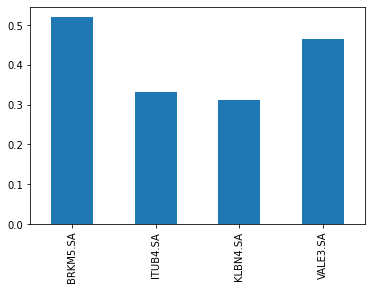

In [ ]:
#Plot - volatilidade anual
volatld.plot(kind='bar');

- **Covariância**

A covariância mede a relação direcional entre os retornos de dois ativos.

Uma covariância positiva significa que os **retornos** dos dois ativos se movem juntos (ambos caem ou sobem), enquanto uma covariância negativa significa que eles se movem inversamente (quando um sobe ou outro tende a cair e vice versa). O risco (assumido como a volatilidade) pode ser reduzido em uma carteira combinando ativos que têm uma covariância negativa.


In [ ]:
# Matriz covariante
#cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov() # Log of percentage change
cov_matrix = df.pct_change().cov() # Sem log of percentage change
cov_matrix = cov_matrix.dropna()
cov_matrix

,BRKM5.SA,ITUB4.SA,KLBN4.SA,VALE3.SA
BRKM5.SA,0.001081,0.000258,0.000176,0.000317
ITUB4.SA,0.000258,0.000442,0.000073,0.000225
KLBN4.SA,0.000176,0.000073,0.000386,0.000134
VALE3.SA,0.000317,0.000225,0.000134,0.000867


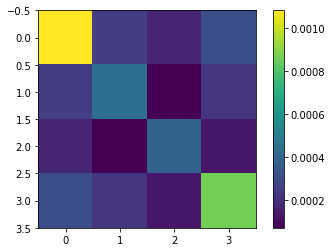

In [ ]:
# plot da matriz covariante
plt.imshow(cov_matrix, interpolation='nearest')
plt.colorbar()
plt.show()


- **Correlação**

A correlação, nos setores de finanças e investimento, é uma estatística que mede o grau em que dois títulos se movem em relação um ao outro. As correlações são usadas no gerenciamento avançado de portfólio, calculado como o coeficiente de correlação, que tem um valor entre $-1$ e $+1$. Você pode pensar na correlação como uma versão normalizada da covariância, em que os valores são restritos a estar entre $[-1,+1]$.

Uma correlação de $-1$ significa relação negativa, ou seja, se a correlação entre o Ativo A e o Ativo B for $-1$, se o Ativo A aumentar, o Ativo B diminuirá.

Uma correlação de $+1$ significa relação positiva, ou seja, se a correlação entre o Ativo A e o Ativo B for $+1$, se o Ativo A aumentar, o Ativo B aumenta.

Uma correlação nula, $0$, significa nenhuma relação, ou seja, se a correlação entre o Ativo A e o Ativo B for $0$, eles não têm qualquer correlação um sobre o outro.

In [ ]:
# Matriz de correlação
#corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix = df.pct_change().corr()
corr_matrix = corr_matrix.dropna()
corr_matrix

,BRKM5.SA,ITUB4.SA,KLBN4.SA,VALE3.SA
BRKM5.SA,1.000000,0.372566,0.272500,0.327451
ITUB4.SA,0.372566,1.000000,0.176228,0.364159
KLBN4.SA,0.272500,0.176228,1.000000,0.232154
VALE3.SA,0.327451,0.364159,0.232154,1.000000


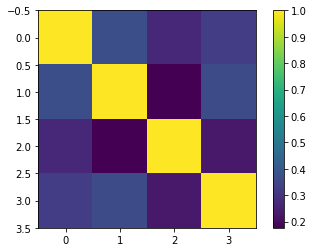

In [ ]:
# plot da Matriz de correlação
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar()
plt.show()



- **Pesos**

Na abordagem clássica de Markowitz, os pesos representamm a alocação percentual dos investimentos entre os ativos da carteia. Eles devem somar 1 (100% do montante investido). Adiante vamos definir uma matriz de pesos aleatórios para achar a carteira ótima. 

Portanto, o problema de otimização de portfólio nada mais é do que encontrar os valores ótimos dos pesos que maximizam os retornos esperados enquanto minimizam o risco (desvio padrão == volatilidade).

In [ ]:
# Exemplo de geração de pesos aleatórios
n_atv = len(ativos)             # Número de ativos
pesos = np.random.random(n_atv) # Escolhendo pesos aleatórios para cada ativo
pesos = pesos/np.sum(pesos)     # Promovendo a normalização
print('ativos: ',ativos)        # Símbolo dos ativos
print('pesos : ',pesos)         # Array de pesos aleatórios

ativos:  ['BRKM5.SA', 'ITUB4.SA', 'VALE3.SA', 'KLBN4.SA']
pesos :  [0.37393436 0.38540517 0.06294786 0.1777126 ]




- **Sharpe Ratio (SR)**

Esse índice é o retorno médio obtido em excesso da taxa livre de risco por unidade de volatilidade ou risco total. Como já visto, a volatilidade é uma medida das flutuações de preço de um ativo ou portfólio.

A taxa de retorno livre de risco é o retorno de um investimento com risco zero, o que significa que é o retorno que os investidores poderiam esperar por não correr risco.

A carteira de risco ideal é aquela com o maior Sharpe Ratio. 

$ SR = \frac{R_p - R_f}{\sigma_o}, $

onde:

$R_p$ é o retorno do portfólio, $R_f$ é taxa de lucro livre de risco, ou fator de risco, e $\sigma_p$ é o desvio padrão do portfólio (volatilidade).


No código abaixo, para descobrir o portfólio com Sharpe Ratio máximo, usamos três taxas de retorno livre de risco (três cenários qualitativamente distintos): a taxa de poupança, a CDI  e o IPCA acumulado dos últimos 12 meses.




# Otimização Clássica Irrestrita

Escolhido ativos nos passos anteriores, os ingredientes essencias da abordagem clássica: o retono anual e a volatilidade. Na sequência, geraremos vários portfólios (pesos), dos quais calculamos o retorno e a volatilidade que pretendemos otimizar.

In [ ]:
# Retorno anual médio
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

BRKM5.SA    0.315420
ITUB4.SA    0.057133
KLBN4.SA    0.114300
VALE3.SA    0.301094
dtype: float64

In [ ]:
# Volatilidade 
# A volatilidade é dada pelo desvio padrão anual. Multiplicamos a volatilidade diária por 250 (de negociação / ano).
# Use 365 ao invés de 250 para criptomoedas
#ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd = df.pct_change().std().apply(lambda x: x*np.sqrt(250))
ann_sd
vol    = df.pct_change().std().apply(lambda x: x*np.sqrt(250))
vol

BRKM5.SA    0.519971
ITUB4.SA    0.332452
KLBN4.SA    0.310576
VALE3.SA    0.465455
dtype: float64

In [ ]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Criando um DataFrame com retornos e volatilidade dos portfólios
assets.columns = ['Returno', 'Risco']
assets

,Returno,Risco
BRKM5.SA,0.315420,0.519971
ITUB4.SA,0.057133,0.332452
KLBN4.SA,0.114300,0.310576
VALE3.SA,0.301094,0.465455


In [ ]:
p_ret    = [] # Define uma "empty list" para os retornos dos portfólios
p_vol    = [] # Define uma "empty list" para a volatilidade dos portfólios
p_pesos  = [] # Define uma "empty list" para os pesos dos ativos no portfólio

num_portfolios = 30000

In [ ]:
for port in range(num_portfolios):
    pesos = np.random.random(n_atv)       #Escolhendo pesos aleatórios para os ativos
    pesos = pesos/np.sum(pesos)
    p_pesos.append(pesos)
    retornos = np.dot(pesos, ind_er)      #Retornos: produto entre os retornos esperados individuais dos ativos e seus pesos 
    p_ret.append(retornos)
    var     = cov_matrix.mul(pesos, axis=0).mul(pesos, axis=1).sum().sum() #Variância do portfolio
    sd      = np.sqrt(var)                #Desvio padrão diário
    ann_sd  = sd*np.sqrt(250)             #Desvio padrão anual  == volatilidade
    p_vol.append(ann_sd)

In [ ]:
data = {'Retorno':p_ret, 'Risco':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data['peso '+ symbol] = [w[counter] for w in p_pesos]

In [ ]:
portfolios  = pd.DataFrame(data)
portfolios.head(n = 10) # Visualizar os n primeiros portfólio dos 30000 portfolios criados com pesos aleatórios

,Retorno,Risco,peso BRKM5.SA,peso ITUB4.SA,peso KLBN4.SA,peso VALE3.SA
0,0.210437,0.322415,0.258932,0.381611,0.006790,0.352667
1,0.178834,0.279401,0.260573,0.340086,0.230333,0.169007
2,0.254797,0.347923,0.420941,0.167160,0.061818,0.350082
3,0.212386,0.364088,0.564985,0.347611,0.064236,0.023167
4,0.230658,0.312596,0.328986,0.163514,0.188752,0.318747
5,0.244005,0.316809,0.341616,0.013722,0.313902,0.330760
6,0.235613,0.338099,0.392839,0.266835,0.032183,0.308144
7,0.185317,0.291115,0.315049,0.342183,0.197068,0.145699
8,0.227332,0.336411,0.395275,0.310643,0.019486,0.274597
9,0.251307,0.341010,0.423608,0.145632,0.108823,0.321938


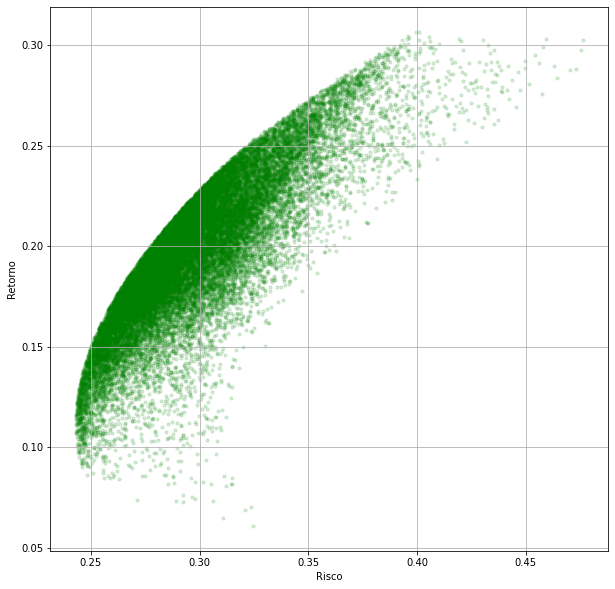

In [ ]:
# Plot da Fronteira Eficiente
portfolios.plot.scatter(x='Risco', y='Retorno', c='green', marker='o', s=10, alpha=0.15, grid=True, figsize=[10,10]);

In [ ]:
min_vol_port = portfolios.iloc[portfolios['Risco'].idxmin()]
# idxmin() retorna o valor mínimo na coluna especificada                         
min_vol_port

Retorno          0.116581
Risco            0.243105
peso BRKM5.SA    0.031743
peso ITUB4.SA    0.383880
peso KLBN4.SA    0.488858
peso VALE3.SA    0.095520
Name: 18938, dtype: float64

In [ ]:
max_ret_port = portfolios.iloc[portfolios['Retorno'].idxmax()]
# idxmax() retorna o valor máximo na coluna especificada                         
max_ret_port

Retorno          0.306713
Risco            0.399414
peso BRKM5.SA    0.483555
peso ITUB4.SA    0.004512
peso KLBN4.SA    0.001112
peso VALE3.SA    0.510821
Name: 1154, dtype: float64

In [ ]:
# Portfólio ótimo (melhor Sharpe Ratio)
# lucro livre de risco (risk factor). Poupança últimos 12 meses ~ 1.56%
rf0 = 0.0156 
opt_ris_por0 = portfolios.iloc[((portfolios['Retorno']-rf0)/portfolios['Risco']).idxmax()]
opt_ris_por0

Retorno          0.273953
Risco            0.350674
peso BRKM5.SA    0.364415
peso ITUB4.SA    0.003591
peso KLBN4.SA    0.168558
peso VALE3.SA    0.463436
Name: 3519, dtype: float64

In [ ]:
# Portfólio ótimo (melhor Sharpe Ratio)
# lucro livre de risco (risk factor). CDI/SELIC últimos 12 meses ~ 2.86%
rf1 = 0.0286 
opt_ris_por1 = portfolios.iloc[((portfolios['Retorno']-rf1)/portfolios['Risco']).idxmax()]
opt_ris_por1

Retorno          0.283121
Risco            0.363342
peso BRKM5.SA    0.409324
peso ITUB4.SA    0.001153
peso KLBN4.SA    0.126105
peso VALE3.SA    0.463418
Name: 12452, dtype: float64

In [ ]:
# Portfólio ótimo (melhor Sharpe Ratio)
# lucro livre de risco (risk factor). IPCA últimos 12 meses ~ 10.06%
# pode ser pensado como CBDs de 10% de retorno anual protegido pelo fundo garantidor de crédito (FGC)
rf2 = 0.1006 
opt_ris_por2 = portfolios.iloc[((portfolios['Retorno']-rf2)/portfolios['Risco']).idxmax()]
opt_ris_por2

Retorno          0.306713
Risco            0.399414
peso BRKM5.SA    0.483555
peso ITUB4.SA    0.004512
peso KLBN4.SA    0.001112
peso VALE3.SA    0.510821
Name: 1154, dtype: float64

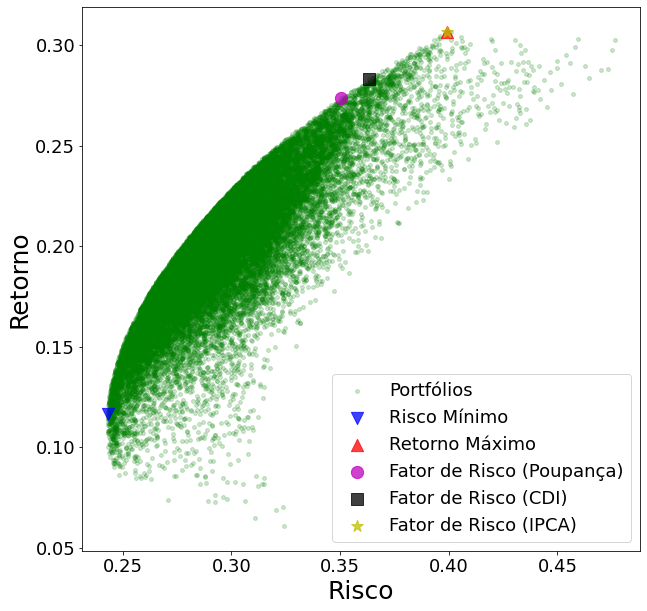

In [ ]:
# Plotando o portfólio com volatilidade mínima e o com lucro máximo
plt.subplots(figsize=[10,10])
xx = portfolios['Risco']
yy = portfolios['Retorno']
plt.scatter(xx, yy ,                          c='g',     marker='o', s=15,  alpha=0.2,  label = 'Portfólios');
plt.scatter(min_vol_port[1], min_vol_port[0], c='b',     marker='v', s=150, alpha=0.75, label = 'Risco Mínimo');
plt.scatter(max_ret_port[1], max_ret_port[0], c='r',     marker='^', s=150, alpha=0.75, label = 'Retorno Máximo');
plt.scatter(opt_ris_por0[1], opt_ris_por0[0], c='m',     marker='o', s=150, alpha=0.75, label = 'Fator de Risco (Poupança)');
plt.scatter(opt_ris_por1[1], opt_ris_por1[0], c='0',     marker='s', s=150, alpha=0.75, label = 'Fator de Risco (CDI)');
plt.scatter(opt_ris_por2[1], opt_ris_por2[0], c='y',     marker='*', s=150, alpha=0.75, label = 'Fator de Risco (IPCA)');
plt.xlabel('Risco',  fontsize=25)
plt.ylabel('Retorno',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc = 'best', fontsize=18);

#### Fit polinomial para extrair a curva de fronteira eficiente

In [ ]:
# fit simples para extrair a curva de fronteira eficiente

# selecionando alguns pontos da fronteira
x = np.array([min_vol_port[1], opt_ris_por0[1], opt_ris_por1[1], opt_ris_por2[1]])
y = np.array([min_vol_port[0], opt_ris_por0[0], opt_ris_por1[0], opt_ris_por2[0]])

# Obs: vamos fazer o fit polinomial com grau "g" de x em função de y, pois o contrário não é função
g = 2
z = np.polyfit(y, x, g) # y em função de x
f = np.poly1d(z)

# criando a curva x's e y's após o fit e calibrando os limites
y_new = np.linspace(y[0] - 0.05, y[-1]+ 0.02, 50)
x_new = f(y_new)


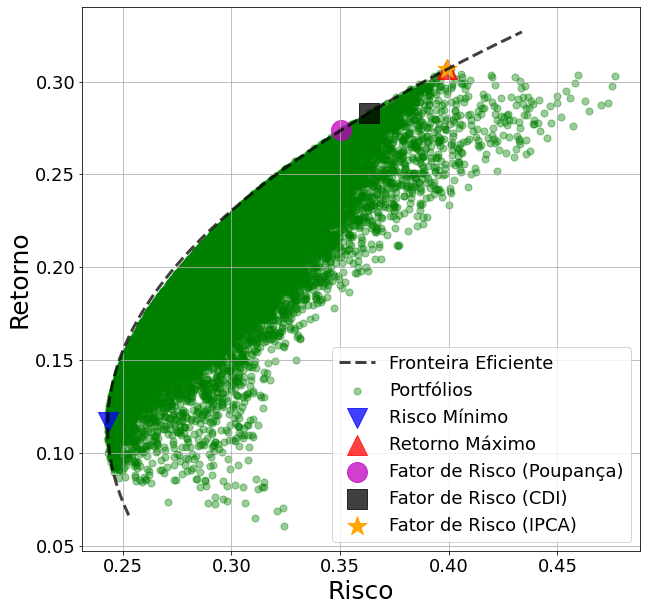

In [ ]:
# Plotando novamente com a fronteira eficiente explícita
plt.subplots(figsize=[10,10])
xx = portfolios['Risco']
yy = portfolios['Retorno']
s1 = 400
plt.scatter(xx, yy ,                          c='g',     marker='o', s=50, alpha=0.4,  label = 'Portfólios');
plt.scatter(min_vol_port[1], min_vol_port[0], c='b',     marker='v', s=s1, alpha=0.75, label = 'Risco Mínimo');
plt.scatter(max_ret_port[1], max_ret_port[0], c='r',     marker='^', s=s1, alpha=0.75, label = 'Retorno Máximo');
plt.scatter(opt_ris_por0[1], opt_ris_por0[0], c='m',     marker='o', s=s1, alpha=0.75, label = 'Fator de Risco (Poupança)');
plt.scatter(opt_ris_por1[1], opt_ris_por1[0], c='0',     marker='s', s=s1, alpha=0.75, label = 'Fator de Risco (CDI)');
plt.scatter(opt_ris_por2[1], opt_ris_por2[0], c='orange',     marker='*', s=s1, alpha=1,    label = 'Fator de Risco (IPCA)');
dv = 0.000 # pequeno deslocamento vertical
plt.plot(x_new, y_new + dv, '--', c  = '0', linewidth=3, alpha=0.75, label = 'Fronteira Eficiente')
plt.xlabel('Risco',  fontsize=25)
plt.ylabel('Retorno',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.legend(loc = 'best', fontsize=18);

In [ ]:
# Instalando o Qiskit (para visualização dos circuitos e comparação)
%%capture
!pip install qiskit==0.32.1

In [ ]:
# Importando pacotes úteis
#from qat.lang.AQASM import Program, CNOT, H, RX, RY, RZ
#from qat.qpus import get_default_qpu
#from qat.qpus import PyLinalg
from numpy import linalg
#
import qiskit
from qiskit import *
from qiskit.aqua.components.optimizers import COBYLA,SLSQP,SPSA
from qiskit.visualization import plot_histogram
#
from numpy import pi
#import matplotlib.pyplot as plt
#%matplotlib inline

## Otimização Revisitada - Abordagem restrita binária
Resolver o seguinte problema de otimização: \begin{split}\begin{aligned} \min_{x \in \{0, 1\}^n} q x^T \sigma x - \mu^T x\\ \text{com a restrição: } 1^T x = B \end{aligned}\end{split}
onde:
- $x \in \{0,1\}^n$ denota o vetor de variáveis ​​de decisão binárias, que indicam quais ativos escolher ($x = 1$) e quais não escolher ($x =0$),
- $\mu \in \mathbf{R}^n$ define os retornos esperados para os ativos, 
- $\sigma \in \mathbf{R}^{n\times n}$ especifica a matriz de covariância entre os ativos,
- $q>0$ controla o apetite de risco do gestor do portfólio,
- e $B$ denota o orçamento, neste caso, o número de ativos a serem selecionados dentre $n$ disponíveis.

Observações:

1 - simplificações assumidas: i) todos os ativos tem o mesmo preço normalizado como $1$ (pensando no log dos preços, não parece uma simplificação tão absurda), ii) o orçamento total deve ser gasto, ou seja, é necessário selecionar exatamente $B$ ativos. 

2- $q$ pode ser visto como uma medida do apetite ao risco pois, ao aumentar $q$, precisamos de maiores retornos para o alcançar o mínimo da função objetiva, o que, pela Fronteira Eficiente, exige maiores riscos!

3- A restrição $1^T x = B$ pode ser imaginada como oriunda de um termo de penalidade do tipo $\alpha (1^T x - B)^2$ incluído explicitamente na função objetiva. Ou seja, o problema com a restrição acima é idêntico à otimização do seguinte:
\begin{split}\begin{aligned} \min_{x \in \{0, 1\}^n} q x^T \sigma x - \mu^T x + \alpha (1^T x - B)^2  \end{aligned}\end{split} pois considerando $\alpha >0$, a menor contribuição do termo de regularização ocorre quando $1^T x = B$.

4- O problema resultante pode ser mapeado para um hamiltoniano cujo estado fundamental corresponde à solução ótima.

Referência: https://qiskit.org/documentation/finance/tutorials/01_portfolio_optimization.html

Essa secção mostra como usar o Variational Quantum Eigensolver (VQE) e o Quantum Approximate Optimization Algorithm (QAOA) para encontrar a solução ideal para um determinado conjunto de parâmetros.



## Quantum Approximate Optimization Algorithm (QAOA)

In [ ]:
mu   = ind_er.to_numpy()      # Retorno
cov  = cov_matrix.to_numpy()  # Covariança

In [ ]:
# CFG
num_assets = n_atv#4
num_qubits = n_atv
num_layers = 8
gamma_size = num_layers
beta_size  = num_layers
penalty   = num_assets        # Estabelece uma escala de penalidade
#
q          = 0.5              # Apetitive ao risco
B          = num_assets // 2  # Orçamento
l          = 1                # Escala de penalidade

# Métodos de Computação Quântica - Qiskit

In [ ]:
from qiskit import Aer
from qiskit.circuit.library import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.finance.applications.ising import portfolio
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.aqua.algorithms import VQE, QAOA, NumPyMinimumEigensolver
#
#from qiskit.finance.data_providers import RandomDataProvider
#from qiskit.aqua.components.optimizers import COBYLA
#import numpy as np
#import matplotlib.pyplot as plt
#import datetime

/usr/local/lib/python3.7/dist-packages/qiskit/finance/__init__.py:50: DeprecationWarning: The package qiskit.finance is deprecated. It was moved/refactored to qiskit_finance (pip install qiskit-finance). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('finance', 'qiskit_finance', 'qiskit-finance')
/usr/local/lib/python3.7/dist-packages/qiskit/optimization/__init__.py:92: DeprecationWarning: The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('optimization', 'qiskit_optimization', 'qiskit-optimization')


In [ ]:
#q         = 0.5              # Apetitive ao risco
#B         = num_assets // 2  # Orçamento

#
qubitOp, offset = portfolio.get_operator(mu, cov, q, B, penalty)

/usr/local/lib/python3.7/dist-packages/qiskit/finance/applications/ising/portfolio.py:84: DeprecationWarning: The package qiskit.aqua.operators is deprecated. It was moved/refactored to qiskit.opflow (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  return WeightedPauliOperator(paulis=pauli_list), offset


In [ ]:
# Imprimir resultado de forma elegante
sigma  = cov
budget = B

def index_to_selection(i, num_assets):
    s = "{0:b}".format(i).rjust(num_assets)
    x = np.array([1 if s[i]=='1' else 0 for i in reversed(range(num_assets))])
    return x


def print_result(result):
    selection = sample_most_likely(result.eigenstate)
    value = portfolio.portfolio_value(selection, mu, sigma, q, budget, penalty)
    print('Solução ótima: vetor {}, valor {:.4f}'.format(selection, value))

    eigenvector = result.eigenstate if isinstance(result.eigenstate, np.ndarray) else result.eigenstate.to_matrix()
    probabilities = np.abs(eigenvector)**2
    i_sorted = reversed(np.argsort(probabilities))
    print('\n----------------- Resultados ---------------------')
    print('vetor\t\tvalor\t\tprobabilidade')
    print('---------------------------------------------------')
    for i in i_sorted:
        x = index_to_selection(i, num_assets)
        value = portfolio.portfolio_value(x, mu, sigma, q, budget, penalty)
        probability = probabilities[i]
        print('%10s\t%.4f\t\t%.4f' %(x, value, probability))

In [ ]:
# Solução "clássica" com Numpy
exact_eigensolver = NumPyMinimumEigensolver(qubitOp)
result = exact_eigensolver.run()

print_result(result)

Solução ótima: vetor [1 0 0 1], valor -0.6152

----------------- Resultados ---------------------
vetor		valor		probabilidade
---------------------------------------------------
 [1 0 0 1]	-0.6152		1.0000
 [1 1 1 1]	15.2146		0.0000
 [0 1 1 1]	3.5288		0.0000
 [1 0 1 1]	3.2710		0.0000
 [0 0 1 1]	-0.4146		0.0000
 [1 1 0 1]	3.3283		0.0000
 [0 1 0 1]	-0.3573		0.0000
 [0 0 0 1]	3.6993		0.0000
 [1 1 1 0]	3.5146		0.0000
 [0 1 1 0]	-0.1709		0.0000
 [1 0 1 0]	-0.4288		0.0000
 [0 0 1 0]	3.8859		0.0000
 [1 1 0 0]	-0.3715		0.0000
 [0 1 0 0]	3.9431		0.0000
 [1 0 0 0]	3.6851		0.0000
 [0 0 0 0]	16.0000		0.0000


/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/minimum_eigen_solvers/minimum_eigen_solver.py:38: DeprecationWarning: The package qiskit.aqua.algorithms.minimum_eigen_solvers is deprecated. It was moved/refactored to qiskit.algorithms.minimum_eigen_solvers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/eigen_solvers/eigen_solver.py:38: DeprecationWarning: The package qiskit.aqua.algorithms.eigen_solvers is deprecated. It was moved/refactored to qiskit.algorithms.eigen_solvers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/operators/state_fns/vector_state_fn.py:215: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to q

# QAOA - Qiskit

In [ ]:
backend = Aer.get_backend('statevector_simulator')
seed = 3

opt = COBYLA()
opt.set_options(maxiter=250)
qaoa = QAOA(qubitOp, opt, 20)

qaoa.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = qaoa.run(quantum_instance)

print_result(result)

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/vq_algorithm.py:72: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algorithms.VariationalAlgorithm (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/components/variational_forms/variational_form.py:48: DeprecationWarning: The package qiskit.aqua.components.variational_forms is deprecated. For more information see <h

Solução ótima: vetor [1. 0. 0. 1.], valor -0.6152

----------------- Resultados ---------------------
vetor		valor		probabilidade
---------------------------------------------------
 [1 0 0 1]	-0.6152		0.2274
 [0 1 1 0]	-0.1709		0.2183
 [0 1 0 1]	-0.3573		0.1713
 [1 1 0 0]	-0.3715		0.1605
 [0 0 1 1]	-0.4146		0.0774
 [1 0 1 0]	-0.4288		0.0454
 [0 0 1 0]	3.8859		0.0256
 [1 1 1 0]	3.5146		0.0157
 [1 0 0 0]	3.6851		0.0136
 [1 0 1 1]	3.2710		0.0129
 [0 0 0 1]	3.6993		0.0101
 [0 1 0 0]	3.9431		0.0093
 [0 1 1 1]	3.5288		0.0060
 [1 1 0 1]	3.3283		0.0040
 [0 0 0 0]	16.0000		0.0014
 [1 1 1 1]	15.2146		0.0011


<font color='blue'>Observe como o "solver" penaliza carteiras com número de ações diferentes do orçamento == 2. Por exemplo, veja o valor da função objetivo para [0 0 0 0] e [1 1 1 1].</font>

# VQE - Qiskit

In [ ]:
backend = Aer.get_backend('statevector_simulator')
seed = 123

opt = COBYLA()
opt.set_options(maxiter=500)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=11, entanglement='full')
vqe = VQE(qubitOp, ry, opt)
vqe.random_seed = seed

quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)

result = vqe.run(quantum_instance)

print_result(result)

Solução ótima: vetor [1. 0. 1. 0.], valor -0.4288

----------------- Resultados ---------------------
vetor		valor		probabilidade
---------------------------------------------------
 [1 0 1 0]	-0.4288		0.7200
 [1 0 0 1]	-0.6152		0.1102
 [0 1 0 1]	-0.3573		0.0684
 [0 0 1 1]	-0.4146		0.0441
 [1 1 0 0]	-0.3715		0.0431
 [0 1 1 0]	-0.1709		0.0139
 [1 0 0 0]	3.6851		0.0001
 [1 1 1 0]	3.5146		0.0001
 [0 0 0 1]	3.6993		0.0000
 [1 1 0 1]	3.3283		0.0000
 [1 0 1 1]	3.2710		0.0000
 [0 0 1 0]	3.8859		0.0000
 [0 0 0 0]	16.0000		0.0000
 [0 1 1 1]	3.5288		0.0000
 [1 1 1 1]	15.2146		0.0000
 [0 1 0 0]	3.9431		0.0000


<font color='blue'>Observe como o "solver" também penaliza carteiras com número de ações diferentes do orçamento == 2. Por exemplo, verifique o valor da função objetivo para [0 0 0 0] e [1 1 1 1].</font>

# Métodos de Computação Quântica com o Atos QLM

O ATOS Quantum Learning Machine (QLM) é um ambiente de teste para a computação quântica desenvolvida pela empresa francesa ATOS e adquirida pelo SENAI CIMATEC para o desenvolvimento de algoritmos quânticos no Centro de Computação Quântica da América Latina. O dispositivo é capaz de simular até 35 qubits e inclui a simulação de ruídos, emulando a arquitetura de computadores quânticos reais.

O QLM também possui interoperabilidade com outras frameworks de computação quântica, o que possibilita o uso de computadores quânticos através da plataforma. Além disso, o myQLM, framework disponibilizado gratuitamente, possibilita também o desenvolvimento e simulação de algoritmos quânticos por usuários domésticos, podendo sker instalado em seus computadores. Por sua completeza, a utilização do QLM para o desenvolvimento de algoritmos de computação quântica se torna interessante, podendo ser utilizado em diferentes etapas do desenvolvimento de algoritmos quânticos.

Para a implementação do QAOA e uma investigação da qualidade das soluções, ver nosso outro notebook disponível em: 

https://github.com/askery/computacao-quantica-aplicada-ao-mercado-financeiro/blob/main/QAOA_myQLM.ipynb

# Notas sobre o QAOA

O QAOA é um algoritmo variacional da computação quântica, desenvolvido por \cite{faihi2014}, adequado para resolver problemas de otimização combinatória. Nesta seção, apresentaremos um problema de otimização combinatória que pode ser modelado como um modelo ferromagnético popular na mecânica estatística: o \textit{Modelo de Ising} (ou \textit{Hamiltoniano de Ising}). O algoritmo consiste em modelar a função objetivo (F.O.) como um \textit{Hamiltoniano de Ising} e transformá-la em operadores unitários, aplicar tais operadores em um estado de entrada, medir os valores esperados, atualizar os parâmetros e repetir o processo até que a função custo seja minimizada. Quando a energia da F.O. é minimizada, a distribuição de probabilidades (obtida após a medição da função de onda $|\psi\rangle$ com os parâmetros ótimos) apresenta uma ocorrência maior do autoestado de $|\psi\rangle$ que fornece a melhor configuração para o problema. 

### Modelo de Ising

O modelo do comportamento de materiais ferromagnéticos pode ser descrito pelo \textit{Hamiltoniano de Ising}. O modelo representa uma cadeia de partículas de spin 1/2, que interagem em pares, sendo que cada constituinte está sujeito à um campo magnético de magnitude $h_i$. Como partículas de spin 1/2 podem assumir apenas duas direções de momento de dipolo ("up" e "down") a interação entre cada par de partículas fornece uma energia (positiva ou negativa) de acordo com as orientações dos spins. Para encontrar a configuração dos momentos de dipolo que fornece o menor valor de energia possível do sistema, a seguinte função objetivo deve ser minimizada: 

\begin{equation} 
    C(z) = - \sum_{<ij>}^{}z_iz_j - \sum_{i}^{}h_iz_i .
\end{equation} 

As variáveis $z_i$ da função objetivo podem assumir apenas valores unitários, sejam eles positivos ou negativos, ou seja, $z_i \in \{-1,+1\}$. As variáveis podem ser escritas como operadores de Pauli-Z ($\sigma_z$), já que $\pm 1$ são autovalores de $\sigma_z$, associados às autofunções de spin das partículas.

### Operador de Fase

Para que seja possível mapear um problema de variáveis binárias $z_i$ para um problema de otimização de autovalores, uma estratégia é substituir as variáveis $z_i \in \{-1,+1\}$ por operadores unitários (que possuem autovalores $\lambda \in \{-1,+1\}$). Diante disso, é possível criar um Operador de Fase que representa as interações entre as partículas adjacentes, bem como a resposta das partículas ao campo magnético aplicado. Trata-se de escrever a função objetivo do problema como um operador unitário para que possa ser aplicada diretamente no circuito. Como visto, o operador descrito na Equação \ref{fo_ising} é não-unitário, visto que não satisfaz o critério da Equação 7. Contudo, cada termo da soma (negligenciando os coeficientes) é um operador unitário. Para descrever este Hamiltoniano define-se o Operador Gamma através da relação


\begin{equation} 
    U(C,\gamma)=e^{-i\gamma C(Z)}=e^{i\gamma\sum_{<ij>}^{}Z_iZ_j + i\gamma\sum_{i}^{}h_iZ_i} .
\end{equation}


Como $C(z)$ é expressa em termos dos operadores Pauli-Z e o produto tensorial entre eles geram matrizes diagonais, $U(C,\gamma)$ também é uma matriz diagonal (porém unitária), onde o parâmetro $\gamma$ é um dos parâmetros variacionais usados no QAOA. Desse modo, o operador $U(C,\gamma)$ pode ser escrito como a operação unitária

\begin{equation} 
    U(C,\gamma)=\prod_{<ij>}^{}e^{i\gamma Z_iZ_j}\prod_{i=0}^{N}e^{i\gamma h_iZ_i} .
\end{equation}

Esse operador (assim como produtos tensoriais entre matrizes de Pauli-Z) apresenta a forma de  uma matriz diagonal, onde os elementos da diagonal são exponenciais complexas que adicionam fases no estado quântico no qual é aplicado.

### Operador de Mistura

O operador $U(B,\beta)$ é aplicado com o objetivo de misturar as amplitudes (gerando interferências destrutivas e construtivas) possibilitando explorar melhor o espaço de busca e aumentando as chances de encontrar, com maior precisão, o ponto ótimo global da função objetivo. O Operador de Mistura pode ser descrito, matematicamente, como


\begin{equation} 
    U(B,\beta) = e^{-i\beta \sum_{j=0}^{N} X_j} \equiv \prod_{j=0}^{N}e^{-i\beta X_j}.
\end{equation}


Tal operador pode ser construído utilizando apenas operações de rotação em \textit{qubits} individuais do tipo RX. Contudo,a eficiência desse operador está diretamente ligada ao tempo de convergência e à acurácia do algoritmo. A Equação \ref{mix} descreve o operador em sua forma mais simples, representado apenas como rotações em torno do eixo $x$ da \textit{Esfera de Bloch}. 

### Função objetivo do QAOA: Medindo Valores Esperados
As operações unitárias apresentadas nas subseções anteriores podem ser representadas como diagramas de circuitos quânticos. No QAOA, cada conjunto das operações em questão são conhecidas como \textit{layers}. A $i$-ésima \textit{layer} do circuito pode ser escrita como


\begin{equation} 
    U(\gamma_i,\beta_i) = U(B,\beta_i)U(C,\gamma_i),
\end{equation}


e, portanto, a sequência desses operadores representa o operador geral do QAOA. Quanto maior o número de \textit{layers}, maior o número de parâmetros do circuito e, consequentemente, maior a acurácia do resultado. Assim como no VQE, a função objetivo do QAOA também é um valor esperado. A diferença entre eles é que, no VQE, utiliza-se um ansatz genérico e no QAOA, por sua vez, o ansatz é construído à partir da função objetivo. A atuação do operador geral do QAOA sobre o estado de entrada $|s\rangle$ pode ser considerada da seguinte maneira:
\begin{equation} 
    |\vec{\gamma},\vec{\beta} \rangle = (U(B,\beta_n)U(C,\gamma_n))...(U(B, \beta_1)U(C,\gamma_1))(U(B,\beta_0)U(C,\gamma_0))|s\rangle.
\end{equation}
Como é de interesse encontrar a configuração de menor energia para o hamiltoniano, a função objetivo do problema é, novamente, a função dos valores esperados de energia, que se minimizada, retorna o menor autovalor de energia do sistema. A função objetivo do problema pode ser expressa como

\begin{equation}
    \langle C(Z) \rangle \equiv \langle\vec{\gamma},\vec{\beta}|C(Z)|\vec{\gamma},\vec{\beta} \rangle.
\end{equation}
Como visto nos capitulos anteriores, o valor esperado de energia também pode ser escrito como um valor médio. Quando o estado quântico é preparado e medido uma quantidade suficiente de vezes, a distribuição de probabilidades obtida nos possibilita calcular o valor esperado como a soma da quantidade de vezes que cada autoestado da função de onda foi medido, multiplicada por suas respectivas energias associadas. Portanto, a função objetivo também pode ser escrita como
\begin{equation} 
    \langle\vec{\gamma},\vec{\beta}|C(Z)|\vec{\gamma},\vec{\beta} \rangle = E_0\alpha_0\langle\vec{\gamma},\vec{\beta}|0\rangle + E_1\alpha_1\langle\vec{\gamma},\vec{\beta}|1\rangle + E_2\alpha_2\langle\vec{\gamma},\vec{\beta}|2\rangle + ... + E_n\alpha_n\langle\vec{\gamma},\vec{\beta}|n\rangle =  \sum_{i=0}^{n}E_ip_i.
\end{equation}


Os parâmetros variacionais, $\gamma$ e $\beta$, são atualizados iterativamente através de métodos clássicos de otimização até que o menor autovalor de energia seja encontrado. Por se tratar de problemas de otimização combinatória, o interesse do problema é no autoestado da base computacional associado ao menor autovalor, que é composto pela \textit{bitstring} formada pela configuração ótima do problema. 


Como visto, o QAOA pode ser usado para encontrar a configuração que minimiza a energia do \textit{Hamiltoniano de Ising}. Por se tratar de um problema de otimização combinatória, percebe-se que o algoritmo é um bom candidato a resolver problemas dessa natureza. 

### O Método Variacional da Mecânica Quântica
Como discutido no Capítulo 2, informações sobre um estado quântico podem ser obtidas por meio de um conjunto de medidas sobre o sistema. Embora nosso objetivo seja encontrar o menor autovalor de uma matriz, a função objetivo do problema é calculada através valor esperado da matriz em questão, visto que se uma função de onda parametrizada por um conjunto de parâmetros $\theta$ é criada, o princípio variacional nos garante que
\begin{equation}
    \langle \mathcal{H}_\theta \rangle \equiv \langle \psi_\theta | \mathcal{H}|\psi_\theta \rangle \geq \lambda_{min}.
\end{equation}

Portanto, se o espaço de busca é suficientemente grande e o objetivo do problema é minimizar o valor esperado da matriz $ \mathcal{H}$, existe um conjunto de parâmetros $\theta'$ que minimiza a função objetivo. Diante disso, podemos afirmar que uma boa e confiável aproximação para o menor autovalor $\lambda{min}$ da matriz $\mathcal{H}$ pode ser dada por

\begin{equation}
    \langle \mathcal{H}_{\theta'}\rangle_{min} \approx \lambda_{min}.
\end{equation}

Uma explicação intuitiva do método variacional pode ser apresentada da seguinte maneira: O valor esperado (ou valor médio) de uma grandeza, pode assumir infinitos valores entre os respectivos máximo e mínimo. Logo, o valor médio de um observável físico nunca será menor que seu autovalor mínimo e nunca será maior que seu autovalor máximo. 

# Perspectivas

Futuros trabalhos nesta linha de pesquisa envolvem a inclusão de ruídos nas etapas quânticas da simulação. Esses ruídos ocorrem naturalmente nos computadores quânticos atuais e induzem erros que ainda não podem ser controlados eficientemente. Dessa forma, ao reproduzir os resultados com a inclusão de ruídos será possível determinar o ponto de transição onde os níveis de ruídos de um computador quântico passa a permitir a aplicação do  QAOA para a otimização de portfólios. 

# Referências

[1] https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/

[2] https://qiskit.org/documentation/finance/tutorials/01_portfolio_optimization.html 